# Euclidean Calculation between two ECGs

First, let's import modules and define functions!

In [25]:
from joblib import Parallel, delayed
from tqdm.notebook import tqdm
from scipy.spatial.distance import euclidean
from datetime import datetime
import random
import numpy as np
from math import sqrt
import h5py
import hdf5plugin
from typing import List
import matplotlib.pyplot as plt

ALL_LEADS = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
ecgno = np.load('/storage/shared/ecg/ecgno_final.npy')
print(len(ecgno))

dtw_ecgs = np.random.choice(ecgno, 100000)
train_id = dtw_ecgs[:60000]
val_id = dtw_ecgs[60000:80000]
test_id = dtw_ecgs[80000:]

manhattan_distance = lambda x, y: np.abs(x - y)

def load_ecg(
    hd5: h5py.File, date: str,
    target_length: int = 2500, 
    leads: List[str] = ALL_LEADS,
):
    out = np.empty((target_length, len(leads)))
    for i, lead in enumerate(leads):
        lead_array = hd5["ecg"][date][lead][()]
        out[:, i] = np.interp(
            np.linspace(0, 1, target_length),
            np.linspace(0, 1, lead_array.shape[0]),
            lead_array,
        )
    return out

5426614


loaded hd5


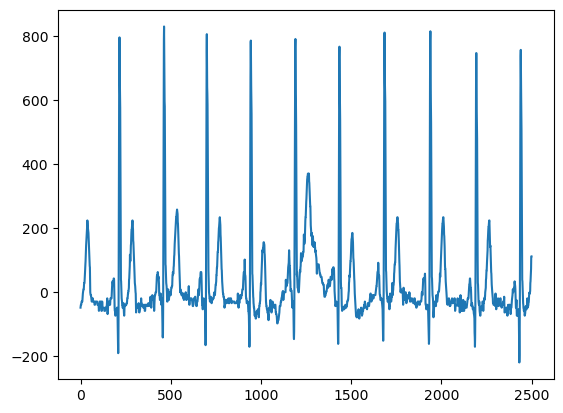

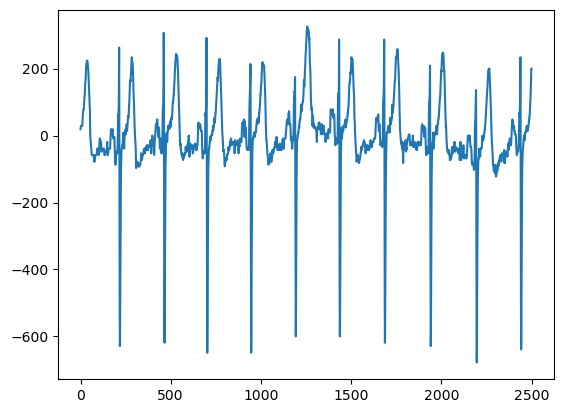

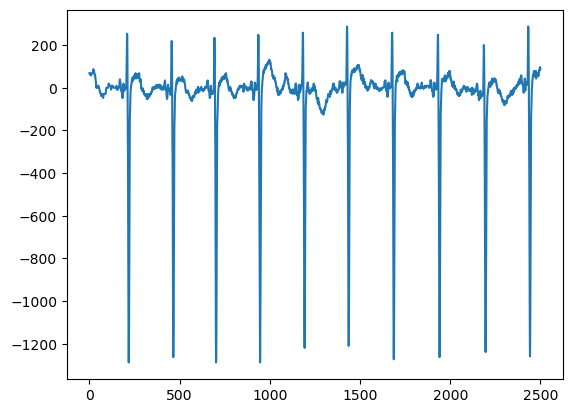

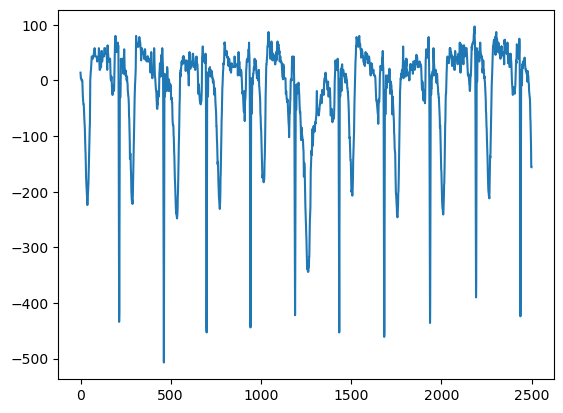

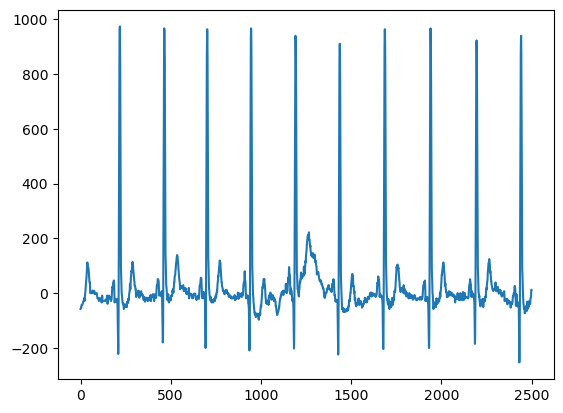

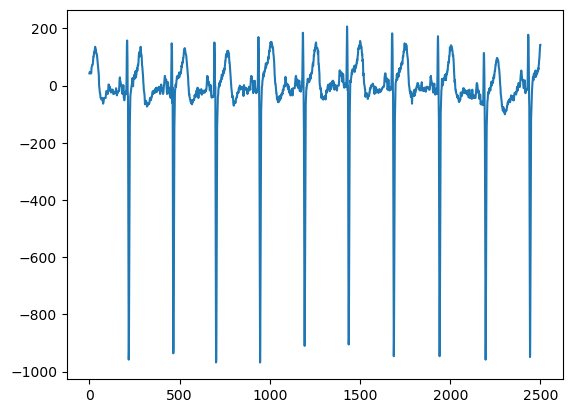

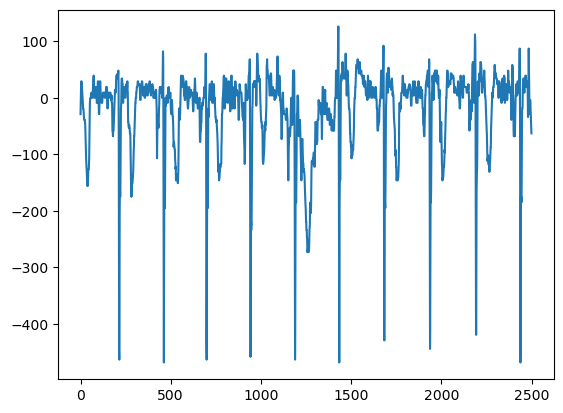

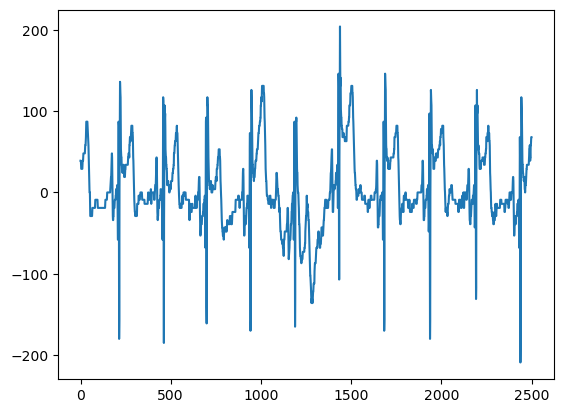

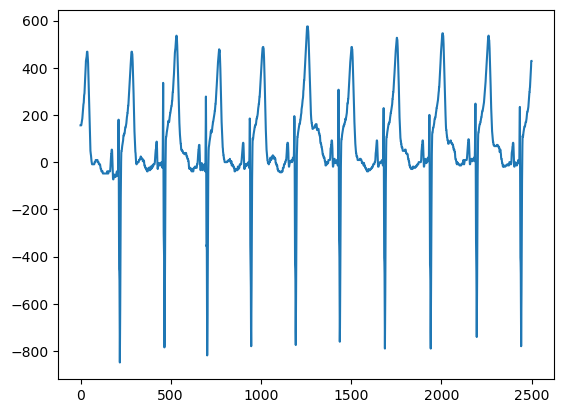

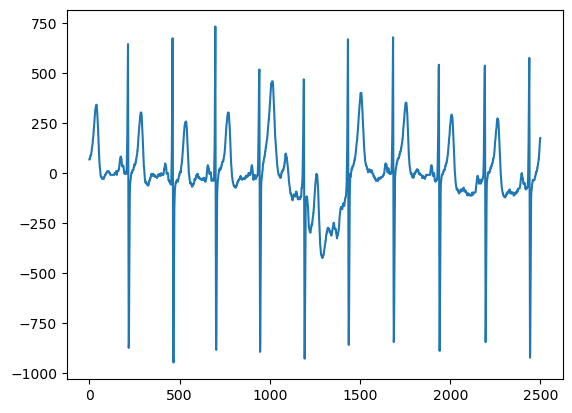

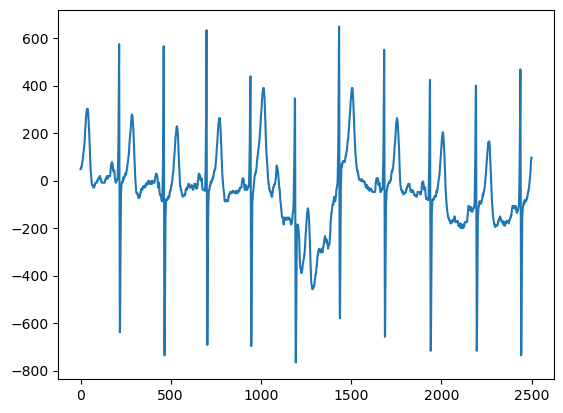

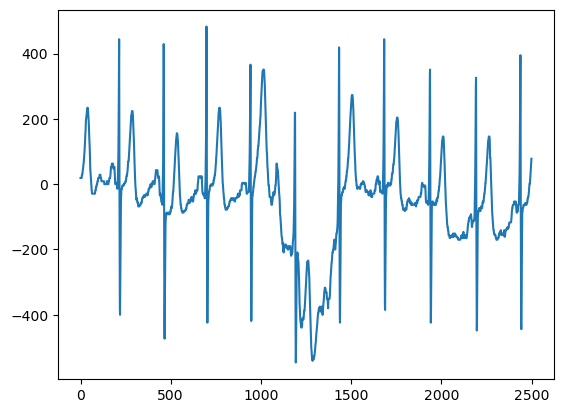

In [26]:
ecg1_id = ecgno[0]
ecg2_id = ecgno[1]
with h5py.File("/storage/shared/ecg/{}/{}.hd5".format(ecg1_id.split('_')[0], ecg1_id.split('_')[1]), "r") as hd5:
    print('loaded hd5')
    ecg1 = load_ecg(hd5, ecg1_id.split('_')[-1])
with h5py.File("/storage/shared/ecg/{}/{}.hd5".format(ecg2_id.split('_')[0], ecg2_id.split('_')[1]), "r") as hd5:
    ecg2 = load_ecg(hd5, ecg2_id.split('_')[-1])
for i in range(12):
    plt.plot(ecg1[:,i].T)
    plt.show()

In [27]:
print(ecg1.shape, ecg2.shape)

(2500, 12) (2500, 12)


# Euclidean Distance between two ECGs

In [34]:
# distance functions
def get_euclidean(ecg1, ecg2): # squared Euclidean distance
    assert len(ecg1) == len(ecg2), "Can't compute Euclidean distance on different-dimensional points"
    squared_euc =  (ecg1-ecg2)**2
    
    print(squared_euc)
    print(squared_euc.shape)
    print(np.sqrt(squared_euc).shape)
    print(np.mean(np.sqrt(squared_euc)))
    
    return np.mean(np.sqrt(squared_euc))

In [35]:
get_euclidean(ecg1, ecg2)

[[1.087849e+06 8.584900e+04 5.640010e+05 ... 1.089936e+06 1.110916e+06
  9.721960e+05]
 [6.691240e+05 6.889000e+03 5.416960e+05 ... 1.482250e+05 3.047040e+05
  3.375610e+05]
 [3.540250e+05 1.587600e+04 5.198410e+05 ... 7.398400e+04 2.401000e+03
  3.097600e+04]
 ...
 [2.500000e+01 1.521000e+03 1.936000e+03 ... 6.084000e+03 8.410000e+02
  5.760000e+02]
 [4.761000e+03 7.744000e+03 3.610000e+02 ... 1.988100e+04 6.084000e+03
  5.476000e+03]
 [4.761000e+03 7.744000e+03 3.610000e+02 ... 1.988100e+04 6.084000e+03
  5.476000e+03]]
(2500, 12)
(2500, 12)
150.07653333333334


150.07653333333334